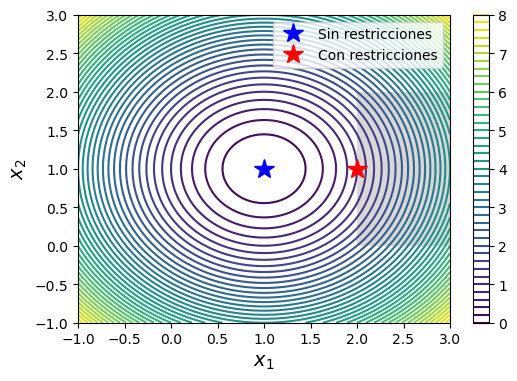

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

def func_X_Y_to_XY(f, X, Y):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f([X[i, j], Y[i, j]])
    return Z

x_opt = optimize.minimize(f, (1, 1), method='BFGS').x

bnd_x1 = (2, 3)
bnd_x2 = (0, 2)

x_cons_opt = optimize.minimize(
    f,
    np.array([1, 1]),
    method='L-BFGS-B',
    bounds=[bnd_x1, bnd_x2]
).x

fig, ax = plt.subplots(figsize=(6, 4))

x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
Z = func_X_Y_to_XY(f, X, Y)

c = ax.contour(X, Y, Z, 50)

# Punto óptimo sin restricciones
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15, label='Sin restricciones')

# Punto óptimo con restricciones
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15, label='Con restricciones')

# Rectángulo de restricciones
bound_rect = plt.Rectangle(
    (bnd_x1[0], bnd_x2[0]),
    bnd_x1[1] - bnd_x1[0],
    bnd_x2[1] - bnd_x2[0],
    facecolor="grey",
    alpha=0.3
)
ax.add_patch(bound_rect)

ax.set_xlabel(r"$x_1$", fontsize=14)
ax.set_ylabel(r"$x_2$", fontsize=14)
ax.legend()

plt.colorbar(c, ax=ax)
plt.show()


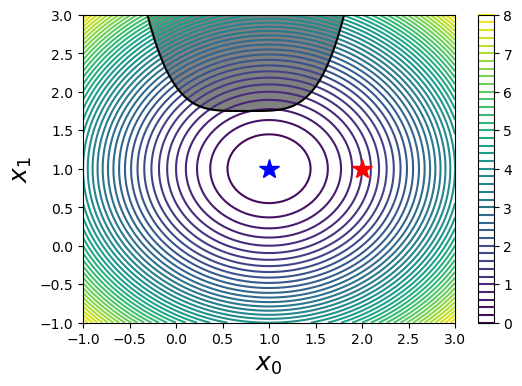

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18 )
plt.colorbar(c, ax=ax)